In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

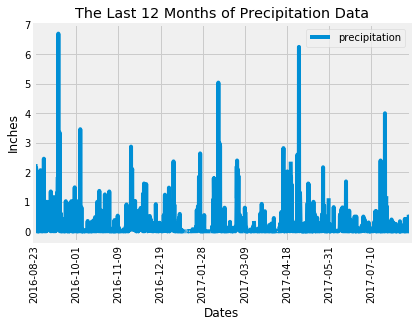

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
rain_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_query)

# Sort the dataframe by date
rain_df.set_index("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot()
plt.title('The Last 12 Months of Precipitation Data')
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.legend(["precipitation"])
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Station.name).count()
stations_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_query = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
most_active_id = active_query[0][0]
most_active_obs = active_query[0][1]
print(f"Most active station: {most_active_id} with {most_active_obs} observations")
print("_______________________________________________________")

# List the stations and the counts in descending order.
for station, count in active_query:
    print(f"Station ID: {station}, Observations: {count}")

Most active station: USC00519281 with 2772 observations
_______________________________________________________
Station ID: USC00519281, Observations: 2772
Station ID: USC00513117, Observations: 2696
Station ID: USC00519397, Observations: 2685
Station ID: USC00519523, Observations: 2572
Station ID: USC00516128, Observations: 2484
Station ID: USC00514830, Observations: 1937
Station ID: USC00511918, Observations: 1932
Station ID: USC00517948, Observations: 683
Station ID: USC00518838, Observations: 342


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == most_active_id).all()
print(f"Lowest temperature: {lowest_temp[0][1]}")
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == most_active_id).all()
print(f"Highest temperature: {highest_temp[0][1]}")
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == most_active_id).all()
print(f"Average temperature: {avg_temp[0][1]}")

Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


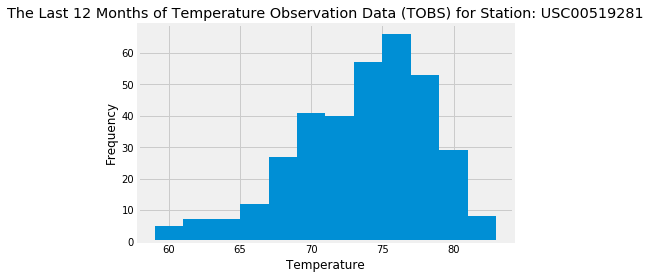

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_rain_query = session.query(Measurement.tobs).filter(Measurement.station == most_active_id, Measurement.date >= last_year).order_by(Measurement.tobs).all()
most_active_df = pd.DataFrame(most_active_rain_query)
most_active_df.hist(column='tobs', bins=12)
plt.title(f'The Last 12 Months of Temperature Observation Data (TOBS) for Station: {most_active_id}')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()